In [ ]:
#OpenCV + Python script for inspecting (counting) pills during manunfacturing

import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read an image
img = cv2.imread('/content/drive/My Drive/ML_UseCases/Defect Detection of Pharma Pills/8.jpg') 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


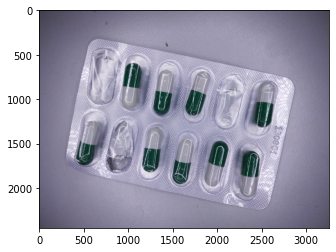

In [ ]:
plt.imshow(img)

In [ ]:
# Convert the image in a numpy array

img = np.array(img, dtype=np.uint8)

In [ ]:
fx = fy = int(200.0 / img.shape[0])

In [ ]:
dim = (100, int(img.shape[1] * fx))

In [ ]:
# Resize the original image

resized = cv2.resize(img, dim, fx = 0.5,fy=0.5)

In [ ]:
# Apply Gaussian blur 
blur = cv2.GaussianBlur(resized,(7,7),0)

In [ ]:
roi_hsv = cv2.cvtColor(blur, cv2.COLOR_RGB2HSV)

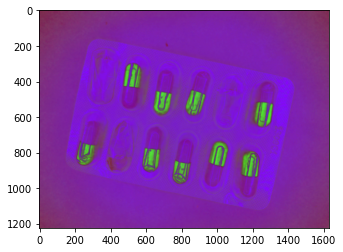

In [ ]:
plt.imshow(roi_hsv)

In [ ]:
# Convert the image in HSV 

h, s, v = cv2.split(roi_hsv)
hsv_image = cv2.merge([h, s, v])

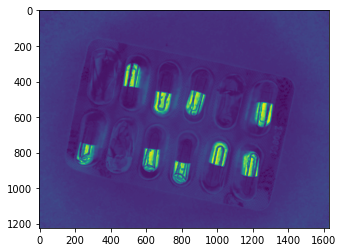

In [ ]:
plt.imshow(s)

In [ ]:
imgOTSU = cv2.threshold(s, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (19, 19),(9,9))

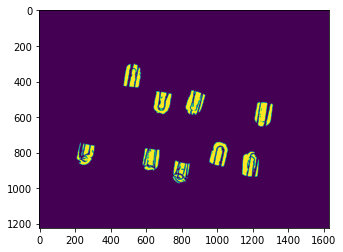

In [ ]:
plt.imshow(imgOTSU[1])

In [ ]:
fgmask = cv2.morphologyEx(imgOTSU[1], cv2.MORPH_CLOSE, kernel)

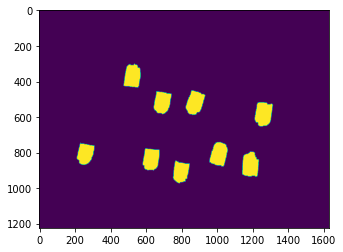

In [ ]:
plt.imshow(fgmask)

In [ ]:
 PillsContours, hierarchy = cv2.findContours(fgmask.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)  


In [ ]:
print ('Number of pills: ', len(PillsContours))

Number of pills:  9


In [ ]:
NumPills = str(len(PillsContours))

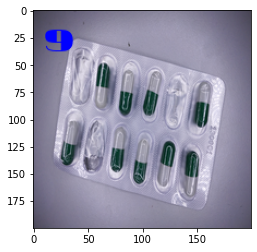

In [ ]:
img = Image.open("/content/drive/My Drive/ML_UseCases/Defect Detection of Pharma Pills/8.jpg")
#imgResized = cv2.resize(img, (0,0), fx=0.5, fy=0.5,interpolation = cv2.INTER_AREA) 

img = img.resize((200, 200), Image.ANTIALIAS)

draw = ImageDraw.Draw(img)
font = ImageFont.truetype("/content/drive/My Drive/ML_UseCases/Defect Detection of Pharma Pills/20db.otf",25)
# draw.text((x, y),"Sample Text",(r,g,b))
draw.text((10, 10),NumPills,(0,0,255),font=font)
img.save('sample-out.jpg')
plt.imshow(img)
